# EDA do sistema de precificacão
---

## Desafio

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema. O uso de outras fontes de dados além do dataset é permitido (e encorajado). Você poderá encontrar em anexo um dicionário dos dados.



## Sobre o Desafio

### Processamento de dados iniciais e carregamento dos módulos e do dataset

Para isso vamos iniciar carregando os módulos que vamos usar no processamento dos dados, para depois analisar o dataset em si.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

data = pd.read_csv("teste_indicium_precificacao.csv")

# Iniciando a análise dos dados

Eu gostaria de dividir o processo em analisar como cada fator em si atua no processo. Separando e categorizando com calma de acordo com o que são relacionados.

Para isso, separei os dados em dois setores, dados de posicionamento e dados qualitativos da residência.


## Analisar as variáveis de posicionamento de cada residência

O que ocorre principalmente que gera um aumento no valor dos edifícios num geral é especialmente localidade. Então seria necessário observar quantos bairros, quantos grupos de bairros e como eles se relacionam para facilitar e elaborar estratégias de como categorizar os valores. Me fazendo elaborar o seguinte código para isso:


### Categorizando e organizando os bairro e os bairro_groups
Analisando e categorizando os bairros e os bairros groups, determinando a quantidade de cada um e quais bairros se juntam com quais bairro_groups de modo mais organizado.

In [ ]:
bairro_group_diferentes = pd.unique(data["bairro_group"])
bairro_diferentes = pd.unique(data["bairro"])
print("Grupos de Bairros diferentes(", len(bairro_group_diferentes), "):",
      bairro_group_diferentes, "\n\nBairros Diferentes (", len(bairro_diferentes), "): ", bairro_diferentes)

Grupos de Bairros diferentes( 5 ): ['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx'] 

Bairros Diferentes ( 221 ):  ['Midtown' 'Harlem' 'Clinton Hill' 'East Harlem' 'Murray Hill'
 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side' 'Chinatown'
 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene' 'Chelsea'
 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood' 'East Village'
 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Kensington' 'Clason Point' 'Eastcheste

In [ ]:
print("Bairros por bairro_group")
bairro_group_bairro = pd.unique(data["bairro_group"] + data["bairro"])
bairro_group_bairro.sort()

bronx = []
brooklyn = []
queens = []
staten_island = []
manhattan = []

for combination in bairro_group_bairro:
  bairro_group_name_size = 0
  if combination[:5] == "Bronx":
    bairro_group_name_size = 5
    bronx.append(combination[bairro_group_name_size:])
  elif combination[:8] == "Brooklyn":
    bairro_group_name_size = 8
    brooklyn.append(combination[bairro_group_name_size:])
  elif combination[0] == "Q":
    bairro_group_name_size = 6
    queens.append(combination[bairro_group_name_size:])
  elif combination[0] == "S":
    bairro_group_name_size = 13
    staten_island.append(combination[bairro_group_name_size:])
  elif combination[0] == "M":
    bairro_group_name_size = 9
    manhattan.append(combination[bairro_group_name_size:])

  print(combination[:bairro_group_name_size] + ": " + combination[bairro_group_name_size:])


Bairros por bairro_group
Bronx: Allerton
Bronx: Baychester
Bronx: Belmont
Bronx: Bronxdale
Bronx: Castle Hill
Bronx: City Island
Bronx: Claremont Village
Bronx: Clason Point
Bronx: Co-op City
Bronx: Concourse
Bronx: Concourse Village
Bronx: East Morrisania
Bronx: Eastchester
Bronx: Edenwald
Bronx: Fieldston
Bronx: Fordham
Bronx: Highbridge
Bronx: Hunts Point
Bronx: Kingsbridge
Bronx: Longwood
Bronx: Melrose
Bronx: Morris Heights
Bronx: Morris Park
Bronx: Morrisania
Bronx: Mott Haven
Bronx: Mount Eden
Bronx: Mount Hope
Bronx: North Riverdale
Bronx: Norwood
Bronx: Olinville
Bronx: Parkchester
Bronx: Pelham Bay
Bronx: Pelham Gardens
Bronx: Port Morris
Bronx: Riverdale
Bronx: Schuylerville
Bronx: Soundview
Bronx: Spuyten Duyvil
Bronx: Throgs Neck
Bronx: Tremont
Bronx: Unionport
Bronx: University Heights
Bronx: Van Nest
Bronx: Wakefield
Bronx: West Farms
Bronx: Westchester Square
Bronx: Williamsbridge
Bronx: Woodlawn
Brooklyn: Bath Beach
Brooklyn: Bay Ridge
Brooklyn: Bedford-Stuyvesant
Broo

### Dados relacionados a posicionamento em si

Para observar se o posicionamento afeta em algo, eu tentei analisar se há alguma conexão entre posicionamento, longitude e latitude e o valor do dia em cada edifício.
Para isso, fiz essa parte aí onde o gráfico expressa isso através do posicionamento dos pontos.O posicionamento de cada prédio com seu valor sendo a altura do gráfico, o eixo z.

Eu aproveitei o processo, removi os outliers que eu achei que atrapalhariam na previsão já do modelo.

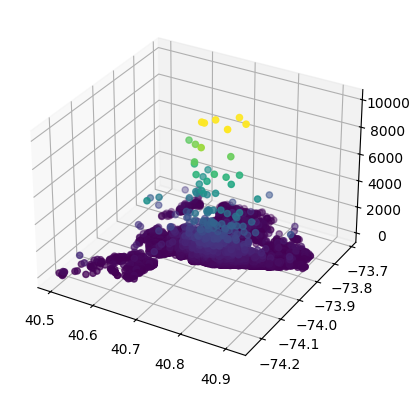

In [ ]:
axes = plt.axes(projection="3d")

xdata = data["latitude"]
ydata = data["longitude"]
zdata = data["price"]

axes.scatter(xdata, ydata, zdata, c=zdata, cmap="viridis")
plt.show()

#### Relacionando valor e localidade, grupo de bairros

O que eu analisei é que em certos pontos concentram muito o valor, o que acaba distorcendo a leitura dos dados. Eu queria analisar bairro por bairro pra entender o que ocorre em cada região. Nesse sentido, caso o usuário indique ao modelo: "o edifício é no grupo de bairros do brooklyn", ele poderia analisar além de através da latitude e longitude, mas levando em conta cada contexto de grupo de bairros.


### Gráfico dos preços para cada grupo de bairros

Analisando os valores em cada região usando do gráfico Scatter para distribuir eles e observar os valores relacionados a cada região.

##### Bronx

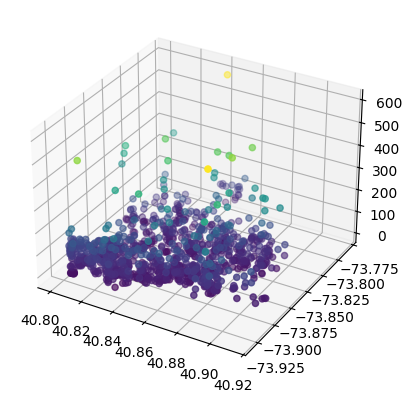

Construcões do Bronx consideradas: 1091
Construcões do Bronx consideradas para o gráfico: 1086
Média: 82.69705340699817
Mediana: 65


In [ ]:
axes = plt.axes(projection="3d")


xdata = data.loc[(data["bairro_group"] == "Bronx") & (data["price"] <= 600)]["latitude"]
ydata = data.loc[(data["bairro_group"] == "Bronx") & (data["price"] <= 600)]["longitude"]
zdata = data.loc[(data["bairro_group"] == "Bronx") & (data["price"] <= 600)]["price"]

preco_bronx = list(zdata.copy())

preco_bronx.sort()
mediana_preco_bronx = preco_bronx[int(len(preco_bronx)/2)]

media_preco_bronx = sum(preco_bronx)/len(preco_bronx)

axes.scatter(xdata, ydata, zdata, c=zdata, cmap="viridis")
plt.show()

print("Construcões do Bronx consideradas:", len(data.loc[data["bairro_group"] == "Bronx"]))
print("Construcões do Bronx consideradas para o gráfico:", len(preco_bronx))
print("Média:", media_preco_bronx)
print("Mediana:", mediana_preco_bronx)

#### Brooklyn

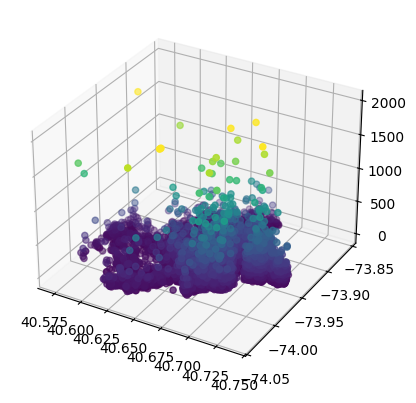

Construcões do Brooklyn consideradas: 20103
Construcões do Brooklyn consideradas para o gráfico: 20084
Média: 120.2288886675961
Mediana: 90


In [ ]:
axes = plt.axes(projection="3d")

xdata = data.loc[(data["bairro_group"] == "Brooklyn") & (data["price"] <= 2000)]["latitude"]
ydata = data.loc[(data["bairro_group"] == "Brooklyn") & (data["price"] <= 2000)]["longitude"]
zdata = data.loc[(data["bairro_group"] == "Brooklyn") & (data["price"] <= 2000)]["price"]

preco_brooklyn = list(zdata.copy())

preco_brooklyn.sort()
mediana_preco_brooklyn = preco_brooklyn[int(len(preco_brooklyn)/2)]

media_preco_brooklyn = sum(preco_brooklyn)/len(preco_brooklyn)

axes.scatter(xdata, ydata, zdata, c=zdata, cmap="viridis")
plt.show()

print("Construcões do Brooklyn consideradas:", len(data.loc[data["bairro_group"] == "Brooklyn"]))
print("Construcões do Brooklyn consideradas para o gráfico:", len(preco_brooklyn))
print("Média:", media_preco_brooklyn)
print("Mediana:", mediana_preco_brooklyn)

#### Manhattan

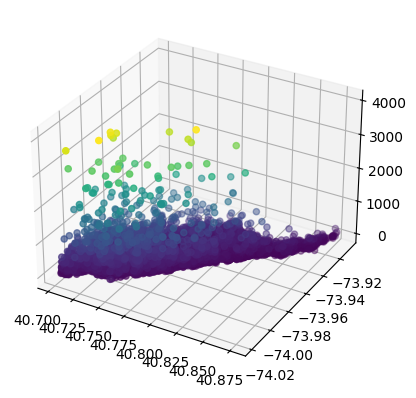

Construcões do Manhattan consideradas: 21661
Construcões do Manhattan consideradas para o gráfico: 21642
Média: 191.0173736253581
Mediana: 150


In [ ]:
axes = plt.axes(projection="3d")

xdata = data.loc[(data["bairro_group"] == "Manhattan") & (data["price"] <= 4000)]["latitude"]
ydata = data.loc[(data["bairro_group"] == "Manhattan") & (data["price"] <= 4000)]["longitude"]
zdata = data.loc[(data["bairro_group"] == "Manhattan") & (data["price"] <= 4000)]["price"]

preco_manhattan = list(zdata.copy())

preco_manhattan.sort()
mediana_preco_manhattan = preco_manhattan[int(len(preco_manhattan)/2)]

media_preco_manhattan = sum(preco_manhattan)/len(preco_manhattan)

axes.scatter(xdata, ydata, zdata, c=zdata, cmap="viridis")
plt.show()

print("Construcões do Manhattan consideradas:", len(data.loc[data["bairro_group"] == "Manhattan"]))
print("Construcões do Manhattan consideradas para o gráfico:", len(preco_manhattan))
print("Média:", media_preco_manhattan)
print("Mediana:", mediana_preco_manhattan)

#### Queens


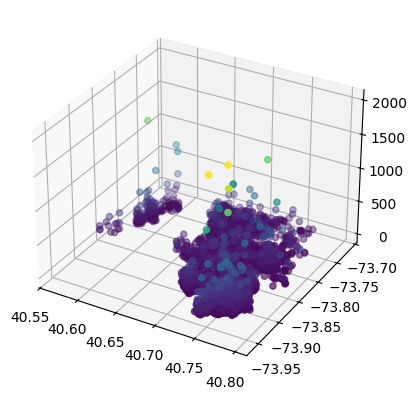

Construcões do Queens consideradas: 5666
Construcões do Queens consideradas para o gráfico: 5663
Média: 96.93042556948613
Mediana: 75


In [ ]:
axes = plt.axes(projection="3d")

xdata = data.loc[(data["bairro_group"] == "Queens") & (data["price"] <= 2000)]["latitude"]
ydata = data.loc[(data["bairro_group"] == "Queens") & (data["price"] <= 2000)]["longitude"]
zdata = data.loc[(data["bairro_group"] == "Queens") & (data["price"] <= 2000)]["price"]

preco_queens = list(zdata.copy())

preco_queens.sort()
mediana_preco_queens = preco_queens[int(len(preco_queens)/2)]

media_preco_queens = sum(preco_queens)/len(preco_queens)

axes.scatter(xdata, ydata, zdata, c=zdata, cmap="viridis")
plt.show()

print("Construcões do Queens consideradas:", len(data.loc[data["bairro_group"] == "Queens"]))
print("Construcões do Queens consideradas para o gráfico:", len(preco_queens))
print("Média:", media_preco_queens)
print("Mediana:", mediana_preco_queens)

#### Staten Island

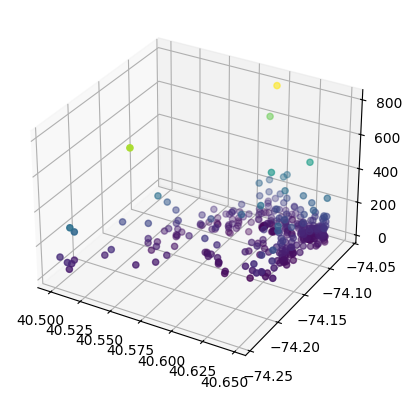

Construcões do Staten Island: 373
Construcões do Staten Island consideradas para o gráfico: 370
Média: 96.14864864864865
Mediana: 75


In [ ]:
axes = plt.axes(projection="3d")

xdata = data.loc[(data["bairro_group"] == "Staten Island") & (data["price"] <= 800)]["latitude"]
ydata = data.loc[(data["bairro_group"] == "Staten Island") & (data["price"] <= 800)]["longitude"]
zdata = data.loc[(data["bairro_group"] == "Staten Island") & (data["price"] <= 800)]["price"]

preco_staten_island = list(zdata.copy())

preco_staten_island.sort()
mediana_preco_staten_island = preco_staten_island[int(len(preco_staten_island)/2)]

media_preco_staten_island = sum(preco_staten_island)/len(preco_staten_island)

axes.scatter(xdata, ydata, zdata, c=zdata, cmap="viridis")
plt.show()

print("Construcões do Staten Island:", len(data.loc[data["bairro_group"] == "Staten Island"]))
print("Construcões do Staten Island consideradas para o gráfico:", len(preco_staten_island))
print("Média:", media_preco_staten_island)
print("Mediana:", mediana_preco_staten_island)

## Dados relacionados a variáveis qualitativas de cada residência

Outro fator que atua muito no valor do edifício, seriam os fatores qualitativos. Como quantidade de quartos oferecidos, disponibilidade, tipo, entre outros.


## Analisando as modalidades de tipo de residência

Os tipos de residência oferecidos definitivamente afetam o valor dela. Portanto, torna-se necessário analisar como cada tipo de residência atua no valor cobrado.

Quantidade de edifícios com room_type Entire Home/Apt: 25409
Preco médio do Entire Home/Apt: 211.79424613325986
Mediana de preco do Entire Home/Apt: 137


Quantidade de edifícios com room_type Private Room: 22325
Preco médio do Private Room: 89.778320268757
Mediana de preco do Private Room: 55


<BarContainer object of 4 artists>

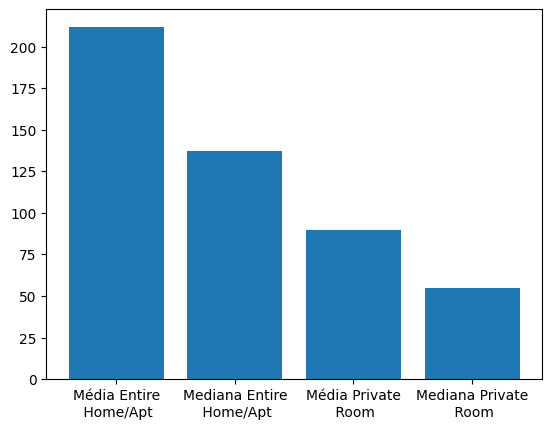

In [ ]:
preco_entire = tuple(data.loc[(data["room_type"] == "Entire home/apt")]["price"])
preco_entire_media = sum(preco_entire)/len(preco_entire)
preco_entire_mediana = preco_entire[int(len(preco_entire)/2)]

print("Quantidade de edifícios com room_type Entire Home/Apt:", len(preco_entire))
print("Preco médio do Entire Home/Apt:", preco_entire_media)
print("Mediana de preco do Entire Home/Apt:", preco_entire_mediana)
print("\n")
preco_private = tuple(data.loc[(data["room_type"] == "Private room")]["price"])
preco_private_media = sum(preco_private)/len(preco_private)
preco_private_mediana = preco_private[int(len(preco_private)/2)]

print("Quantidade de edifícios com room_type Private Room:", len(preco_private))
print("Preco médio do Private Room:", preco_private_media)
print("Mediana de preco do Private Room:", preco_private_mediana)

plt.bar(("Média Entire\n Home/Apt", "Mediana Entire\n Home/Apt", "Média Private\n Room", "Mediana Private\n Room"),
 (preco_entire_media, preco_entire_mediana, preco_private_media, preco_private_mediana))


Aqui dá para observar que o tipo de residência realmente afeta o valor dela.

## Analisando as reviews

Para iniciar a análise, observar como se distribui sem filtro. Adicionando mais análises conforme o desenvolvimento para entender melhor como tudo se dá.

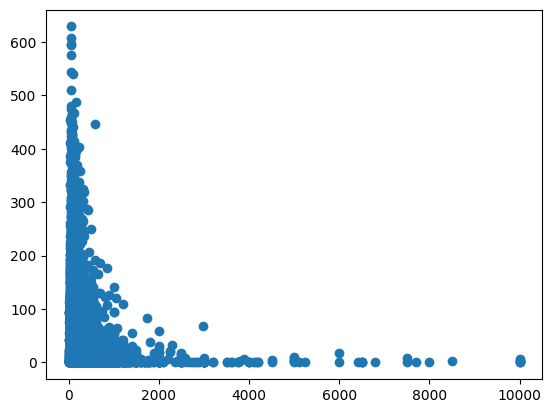

In [ ]:
reviews = data["numero_de_reviews"]
prices = data["price"]

plt.scatter(prices, reviews)
plt.show()

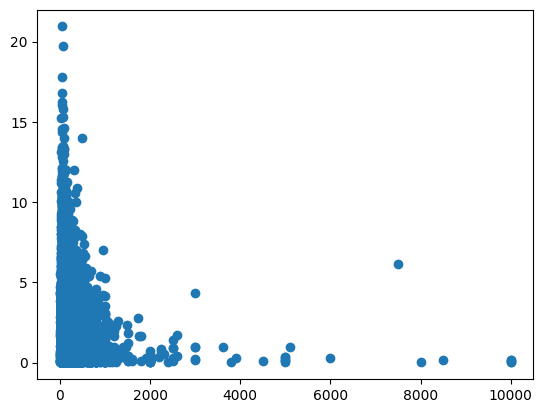

In [ ]:
freq_review = data.loc[data["reviews_por_mes"] < 25]["reviews_por_mes"]
prices = data.loc[data["reviews_por_mes"] < 25]["price"]

plt.scatter(prices, freq_review)
plt.show()

O que esses dois gráficos demonstram é como a maior parte das reviews se concentram para a menor faixa de valores. Portanto, seriam fatores que atuam de modo a indicar, em tendência, valores menores por prédio.

## Analisando o tempo mínimo de estadia

Seria necessaŕio observar o quanto os pontos se distribui ao longo do gráfico, a tendência de valores para eles e aspectos estatísticos comuns, como mediana e média para observar como se dá a tendência.

### Distribuindo sem filtro

Observar como os dados se distribui ao longo das faixas de valores pode ser útil para elaborar uma tendência geral para o modelo.

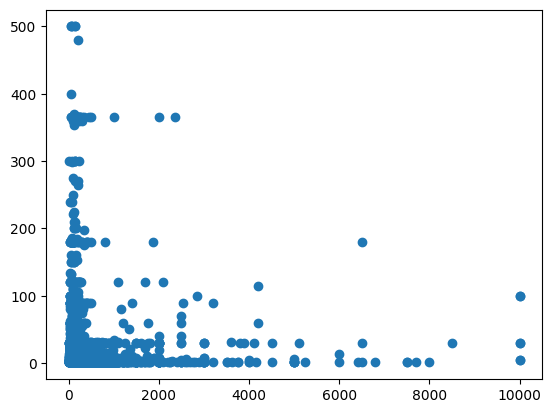

In [ ]:

minimo_noites = data.loc[data["minimo_noites"] < 600]["minimo_noites"]
prices = data.loc[data["minimo_noites"] < 600]["price"]

plt.scatter(prices, minimo_noites)
plt.show()

### Observando outros aspectos da tendência de distribuicão

Vou aplicar isso especialmente pela confusão de como tudo se distribui. Para isso, vamos iniciar observando alguns fatores básicos, média e mediana. Para observar o comportamento que se é visto em todos os pontos. O modo como calculei foi baseado numa média e numa mediana para as faixas de valores para agrupar os valores melhor.

#### Média

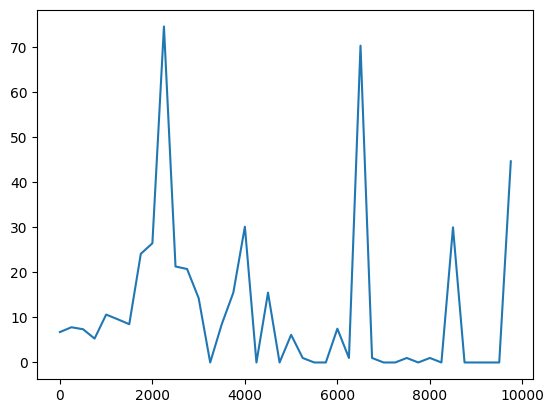

In [ ]:
preco_limite = 10000

minimo_noites = data.loc[(data["price"] <= preco_limite) & (data["minimo_noites"] < 600)]["minimo_noites"].to_list()
prices = data.loc[(data["price"] <= preco_limite) & (data["minimo_noites"] < 600)]["price"].to_list()
tamanho_prices = len(prices)

# Criando os "plots" para criar o gráfico de plot organizado
numero_pontos_plot_media = 40
distancia_entre_pontos = preco_limite // numero_pontos_plot_media
pontos = [[] for _ in range(numero_pontos_plot_media+1)]

# Adicionando os valores para cada quadrante (os numero_plots_media_iqr é para indicar isso) para organizar o gráfico de plot
for i in range(len(minimo_noites)):
  pontos[int(float(prices[i]) // distancia_entre_pontos)].append(minimo_noites[i])

# Mostrando a média de cada "plot"/parte do que dividimos nosso gráfico
for i in range(numero_pontos_plot_media):
  if len(pontos[i]) > 0:
    pontos[i] = sum(pontos[i]) / len(pontos[i])
  else:
    pontos[i] = 0

pontos.pop()
plt.plot(range(0, preco_limite, preco_limite//numero_pontos_plot_media), pontos)
plt.show()

#### Mediana

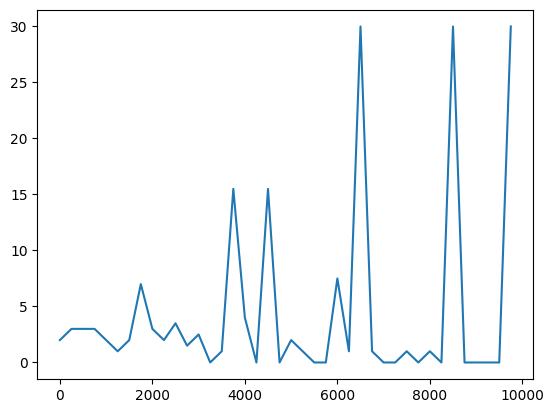

In [ ]:
preco_limite = 10000

minimo_noites = data.loc[(data["price"] <= preco_limite) & (data["minimo_noites"] < 600)]["minimo_noites"].to_list()
prices = data.loc[(data["price"] <= preco_limite) & (data["minimo_noites"] < 600)]["price"].to_list()
tamanho_prices = len(prices)

numero_pontos_plot_mediana = 40
distancia_entre_pontos = preco_limite // numero_pontos_plot_mediana
pontos = [[] for _ in range(numero_pontos_plot_mediana+1)]

# Adicionando os pontos aos indices respectivos
for i in range(len(minimo_noites)):
  pontos[int(float(prices[i]) // distancia_entre_pontos)].append(minimo_noites[i])

# Organizando para pegar a mediana de cada ponto
for i in range(len(pontos)):
  pontos[i].sort()

# Checando a mediana e substituindo a posicão usada para o plot de cada ponto pela média dos pontos naquela faixa
for i in range(numero_pontos_plot_mediana):
  if len(pontos[i]) > 0 and (len(pontos[i]) % 2 != 0 or len(pontos[i]) == 1):
     pontos[i] = pontos[i][len(pontos[i]) // 2]
  elif len(pontos[i]) > 1:
    pontos[i] = (pontos[i][len(pontos[i]) // 2] + pontos[i][len(pontos[i]) // 2 - 1]) / 2
  else: pontos[i] = 0


pontos.pop()
plt.plot(range(0, preco_limite, preco_limite//numero_pontos_plot_media), pontos)
plt.show()

#### Refazer a média (IQR)

Eu decidi refazer o cálculo da média porque queria ver se o fato de haver muitos pontos baixos na distribuicão teriam de algum modo afetado a média. Então eu vou tentar aplicar IQR para prevenir isso de afetar a precisão do modelo.

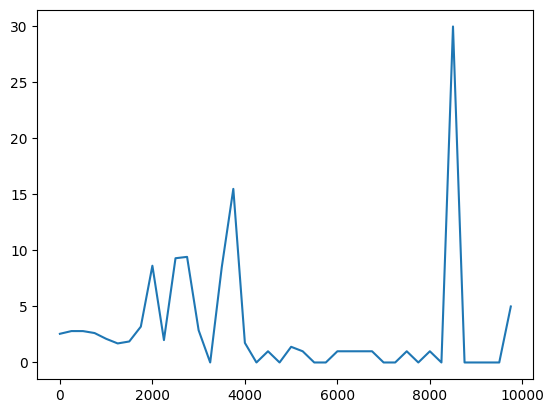

In [ ]:
preco_limite = 10000

minimo_noites = data.loc[(data["price"] <= preco_limite) & (data["minimo_noites"] < 600)]["minimo_noites"].to_list()
prices = data.loc[(data["price"] <= preco_limite) & (data["minimo_noites"] < 600)]["price"].to_list()
tamanho_prices = len(prices)

# Criando os "plots" para criar o gráfico de plot organizadinho
numero_pontos_plot_media_iqr = 40
distancia_entre_pontos = preco_limite // numero_pontos_plot_media_iqr
pontos = [[] for _ in range(numero_pontos_plot_media_iqr+1)]

# Adicionando os valores para cada quadrante (os numero_plots_media_iqr é para indicar isso) para organizar o gráfico de plot
for i in range(len(minimo_noites)):
  pontos[int(float(prices[i]) // distancia_entre_pontos)].append(minimo_noites[i])

# Organizando os valores para aplicar IQR
for i in range(len(pontos)):
  pontos[i].sort()

# Analisando os números para aplicar iqr no algoritmo e diminuir a influência dos outliers
for i in range(numero_pontos_plot_media_iqr):
  if len(pontos[i]) > 0:
    q1 = pontos[i][len(pontos[i])//4]
    if len(pontos[i]) % 2 != 0:
      iqr = pontos[i][len(pontos[i])//4*2]
    else:
      iqr = (pontos[i][len(pontos[i])//4*2] + pontos[i][len(pontos[i]) // 4 * 2 - 1]) / 2
    q3 = pontos[i][len(pontos[i])//4*3]

    max_over = q3 + 1.5*iqr
    min_under = q1 - 1.5*iqr

    media = 0
    cont = 0
    for n in pontos[i]:
      if n < max_over and n > min_under:
        media += n
        cont += 1

    pontos[i] = media / cont
  else:
    pontos[i] = 0

pontos.pop()

plt.plot(range(0, preco_limite, preco_limite//numero_pontos_plot_media_iqr), pontos)
plt.show()

O que esses dados apontam é como se distribui o minimo de noites necessárias de alugar para cada faixa de valor. Isso ajuda a mapear o relacionamento de cada como algo pouco relacionado. Não é um aumento direto nem regresso direto. Atua de modo pouco no valor.

# Montagem de modelo

Partindo das variáveis analisadas, agora sobra alimentar o modelo com elas para elaborar um raciocínio que leve a uma precisão adequada.

Primeiro, vamos importar as ferramentas necessárias para elaborar a IA.

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import tensorflow as tf


Infelizmente, não consegui finalizar a inteligência artificial. Não consegui finalizar o modelo sem compilar. Então irei deixar por aqui. Ainda faltou alguns elemento de análise e a análise quantificada não ocorreu.